# Ecuación de calor en 1D

## Discretización del espacio y del tiempo:

In [17]:
L = 10.0
N = 30

xs = range(-L, stop=L, length=N+1)

-10.0:0.6666666666666666:10.0

In [20]:
xs.step   # xs.<TAB>

Base.TwicePrecision{Float64}(0.6666666666666643, 2.3684757858670005e-15)

In [21]:
k = xs[2] - xs[1]

0.6666666666666661

In [19]:
(L - (-L)) / k

30.00000000000003

In [7]:
collect(xs)

30-element Array{Float64,1}:
 -10.0               
  -9.310344827586206 
  -8.620689655172415 
  -7.931034482758621 
  -7.241379310344827 
  -6.551724137931035 
  -5.862068965517241 
  -5.172413793103448 
  -4.482758620689655 
  -3.793103448275862 
  -3.103448275862069 
  -2.413793103448276 
  -1.7241379310344827
   ⋮                 
   2.413793103448276 
   3.103448275862069 
   3.793103448275862 
   4.482758620689655 
   5.172413793103448 
   5.862068965517241 
   6.551724137931035 
   7.241379310344827 
   7.931034482758621 
   8.620689655172415 
   9.310344827586206 
  10.0               

In [16]:
t0 = 0.0
tf = 10.0
h = 0.1

ts = range(t0, stop=tf, step=h)  # o ts = t0:h:tf

0.0:0.1:10.0

In [14]:
2^(-3.0)

0.125

In [15]:
collect(0:0.125:1000)  # preferir paso de tamaño 0.125 en lugar de 0.1

8001-element Array{Float64,1}:
    0.0  
    0.125
    0.25 
    0.375
    0.5  
    0.625
    0.75 
    0.875
    1.0  
    1.125
    1.25 
    1.375
    1.5  
    ⋮    
  998.625
  998.75 
  998.875
  999.0  
  999.125
  999.25 
  999.375
  999.5  
  999.625
  999.75 
  999.875
 1000.0  

## Condición inicial

Para representar una delta de Dirac de forma discreta:

$u_0(x_i) = 0$ si $x_i \neq 0$; y $u_0(x_i=0) = 1/k$

In [22]:
u0 = zeros(length(xs))

31-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [23]:
u0[length(xs)/2]

ArgumentError: ArgumentError: invalid index: 15.5 of type Float64

In [25]:
mitad = Int(floor(length(xs) / 2))

15

In [28]:
mitad = floor(Int, length(xs) / 2) + 1   # "ceiling"

16

In [33]:
Int( (length(xs) + 1) / 2 )

16

In [35]:
indice_mitad = ceil(Int, length(xs) / 2)  # ceiling

16

In [36]:
u0[indice_mitad] = 1 / k

1.5000000000000013

In [42]:
show(u0)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [43]:
using Plots

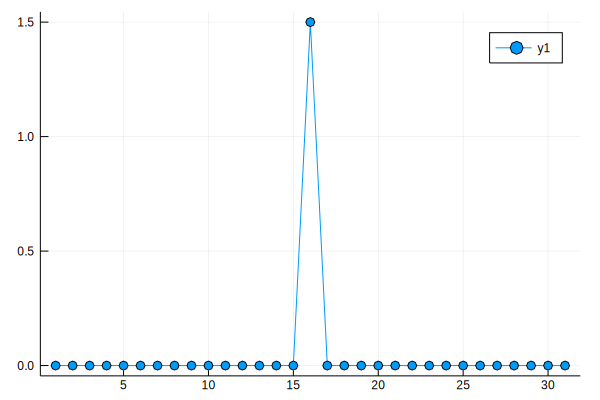

In [44]:
plot(u0, m=:o)

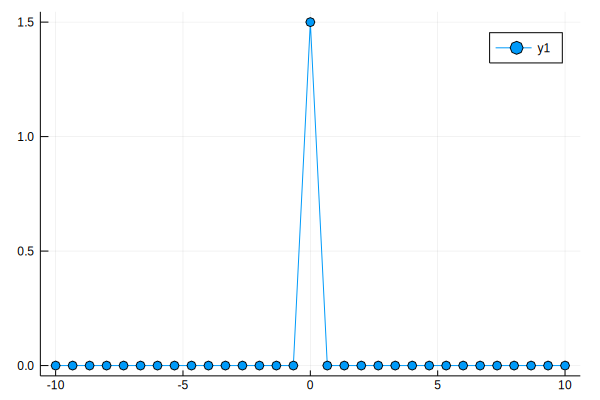

In [45]:
plot(xs, u0, m=:o)

Esto me da el vector inicial $\mathbf{u}^0$ con componentes $(\mathbf{u}^0)_i = u^0_i$.

## ¡Hacer el trabajo!: un paso de la evolución de la ecuación de calor discreta

In [47]:
u1 = zeros(length(u0))

31-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Ahora rellenemos $u_1$ correctamente, según la regla que nos da la ecuación de calor:

$$u_i^{n+1} = u_i^n + \frac{\kappa h}{k^2} \left({u_{i-1}^n - 2u_{i}^n + u_{i+1}^n} \right).$$

Para $n=0$:

$$u_i^{1} =  u_i^0 + \alpha \left({u_{i-1}^0 - 2u_{i}^0 + u_{i+1}^0} \right),$$

donde
$$\alpha := \frac{\kappa h}{k^2}.$$

Esto es para todas las $i$s en el **bulto**, es decir, excepto los valores de frontera $u_0^1$ y $u_N^1$.

**OJO**: En matemáticas, los vectores tienen índices que corren de $0$ hasta $N$. En Julia, comienzan los índices en $1$; por lo tanto, corren hasta $N+1$, y los índices extremos son el $1$ y $N+1$.

Para evitar esto, se puede utilizar el paquete `OffsetArrays.jl`.

In [49]:
length(xs) == N+1   # ✓  # \checkmark

true

In [51]:
κ = 1.0

α = (κ * h) / (k^2)

0.22500000000000042

In [53]:
for i in 2:N  # excluyendo los índices extremos 0 y N+1
    u1[i] = u0[i] + α * (u0[i-1] - 2*u0[i] + u0[i+1])
end

# fronteras:
u1[1] = 0.0
u1[N+1] = 0.0

0.0

In [55]:
show(u1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3375, 0.825, 0.3375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

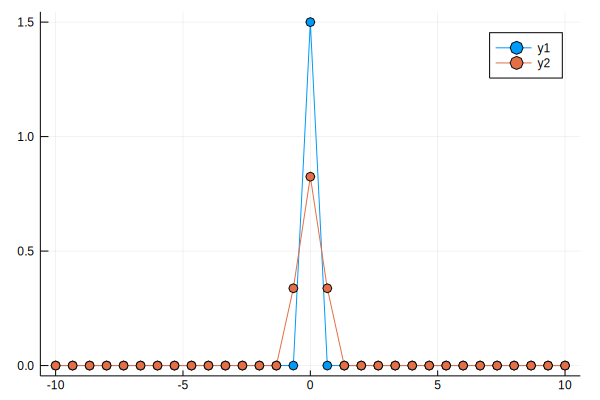

In [57]:
plot(xs, u0, m=:o)
plot!(xs, u1, m=:o)

## Empaquetar todo esto en una función

In [63]:
function paso_ecuación_calor(u, α)
    
    u_nueva = zeros(length(u))
    
    N = length(u) - 1
    
    for i in 2:N  # excluyendo los índices extremos 0 y N+1
        u_nueva[i] = u[i] + α * (u[i-1] - 2*u[i] + u[i+1])
    end

    # fronteras:
    u_nueva[1] = 0.0
    u_nueva[end] = 0.0
    
    return u_nueva
end

paso_ecuación_calor (generic function with 1 method)

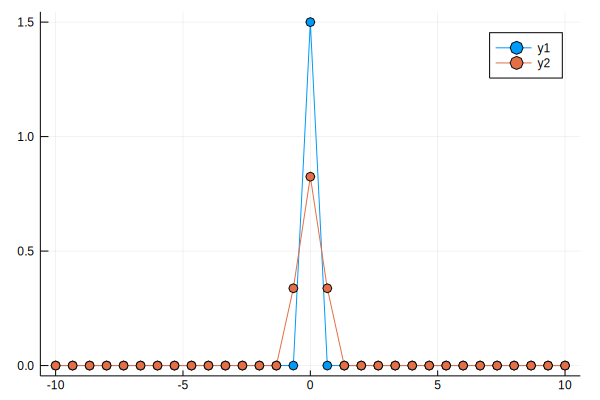

In [64]:
u1 = paso_ecuación_calor(u0, α);

plot(xs, u0, m=:o)
plot!(xs, u1, m=:o)

## ¡Muchos pasos!

In [ ]:
# discretizar espacio y tiempo

L = 10.0
N = 30

xs = range(-L, stop=L, length=N+1)

k = xs[2] - xs[1]


t0 = 0.0
tf = 10.0
h = 0.1

ts = range(t0, stop=tf, step=h)  # o ts = t0:h:tf

# cond inic
u0 = zeros(length(xs))

indice_mitad = ceil(Int, length(xs) / 2)  # ceiling
u0[indice_mitad] = 1 / k

In [65]:
α = 1.0

1.0

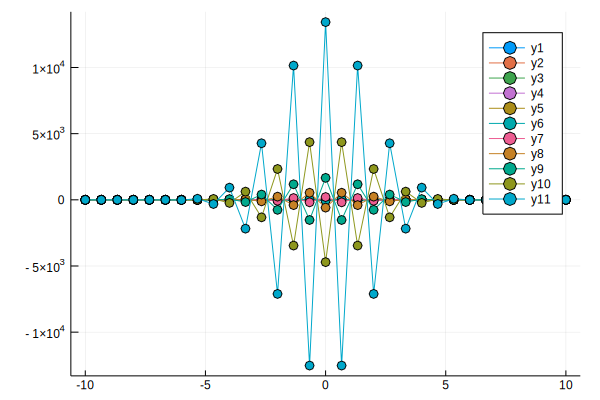

In [67]:
p = plot()

u = u0
plot!(xs, u, m=:o)

for t in 1:10
    u = paso_ecuación_calor(u, α)
    plot!(xs, u, m=:o)
end

p

Vemos que el método numérico es **inestable**. Resulta que el villano es $\alpha$: si bajamos $\alpha$, podemos hacer funcionar el método.

Tarea: Ver análisis de estabilidad de Von Neumann en los libros.

Criterio de Courant--Friedrichs--Lewy (CFL) que da el valor crítico de $\alpha$, bajo el cual funciona el método.

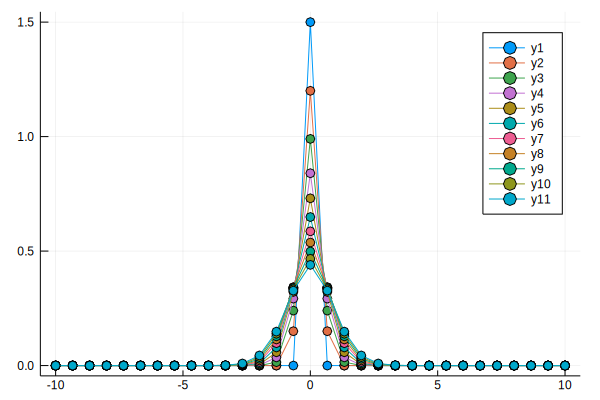

In [68]:
α = 0.1

p = plot()

u = u0
plot!(xs, u, m=:o)

for t in 1:10
    u = paso_ecuación_calor(u, α)
    plot!(xs, u, m=:o)
end

p

In [113]:
α = 0.1

u = u0

resultados = [u]

plot!(xs, u, m=:o)

for t in 1:10
    u = paso_ecuación_calor(u, α)
    plot!(xs, u, m=:o)
    
    push!(resultados, u)
end


In [114]:
resultados

11-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                  
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                  
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                  
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                  
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                  
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                  
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Si quisiera tener una matriz:

In [115]:
hcat(resultados[1], resultados[2])  # con*cat*enación *h*orizontal

31×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 ⋮       
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [116]:
hcat(resultados...)  # "splat"

31×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0     0.0      …  0.0        0.0         0.0        
 0.0  0.0  0.0  0.0     0.0         0.0        0.0         0.0        
 0.0  0.0  0.0  0.0     0.0         0.0        0.0         0.0        
 0.0  0.0  0.0  0.0     0.0         0.0        0.0         0.0        
 0.0  0.0  0.0  0.0     0.0         0.0        0.0         0.0        
 0.0  0.0  0.0  0.0     0.0      …  0.0        0.0         1.5e-10    
 0.0  0.0  0.0  0.0     0.0         0.0        1.5e-9      1.2e-8     
 0.0  0.0  0.0  0.0     0.0         1.5e-8     1.08e-7     4.335e-7   
 0.0  0.0  0.0  0.0     0.0         9.6e-7     3.4695e-6   9.324e-6   
 0.0  0.0  0.0  0.0     0.0         2.7e-5     6.5376e-5   0.000132487
 0.0  0.0  0.0  0.0     0.0      …  0.0004368  0.00079839  0.00130357 
 0.0  0.0  0.0  0.0     0.00015     0.0044625  0.00658325  0.00904379 
 0.0  0.0  0.0  0.0015  0.0048      0.0296957  0.0369736   0.0441364  
 ⋮                               ⋱                   

Más eficiente:

In [120]:
M = reduce(hcat, resultados)'

11×31 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.0  0.0  0.0  0.0  0.0  0.0      …  0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0      …  0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.5e-10  …  1.5e-10  0.0  0.0  0.0  0.0  0.0

In [121]:
M

11×31 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.0  0.0  0.0  0.0  0.0  0.0      …  0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0      …  0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.5e-10  …  1.5e-10  0.0  0.0  0.0  0.0  0.0

In [119]:
size(M)

(31, 11)

In [124]:
M = collect(M)

11×31 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0      …  0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0      …  0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.5e-10  …  1.5e-10  0.0  0.0  0.0  0.0  0.0

In [125]:
heatmap(ts, xs, M, clim=(-10, 10))

DimensionMismatch: DimensionMismatch("new dimensions (101, 31) must be consistent with array size 341")

In [96]:
size(f.(M))

(31, 11)

In [ ]:
size(tsz)

In [112]:
f(x) = (x == 0.0) ? 0.0 : -log(x)   # operador ternario ("ternary")

heatmap(xs, ts, M, c=:blues)

DimensionMismatch: DimensionMismatch("new dimensions (31, 101) must be consistent with array size 110")

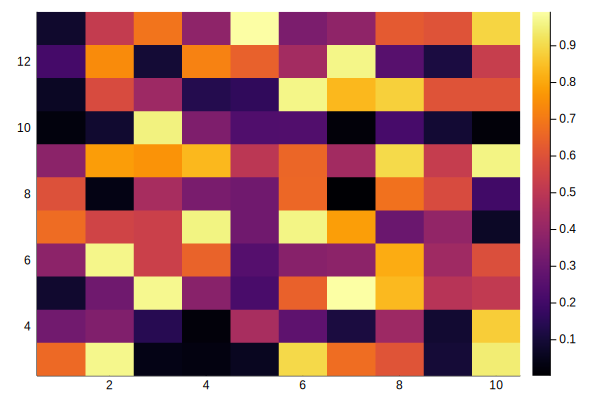

In [127]:
as = 1:10
bs = 3:13
M2 = rand(length(as), length(bs))

heatmap(as, bs, M2)

In [128]:
size(M2)

(10, 11)